# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.100143e+01     6.356375e+00
 * time: 0.004562854766845703
     1     3.003358e+01     6.762377e+00
 * time: 0.013704061508178711
     2     2.526326e+01     8.331890e+00
 * time: 0.03570985794067383
     3     1.625265e+01     4.628708e+00
 * time: 0.06116986274719238
     4     1.275862e+01     1.592728e+00
 * time: 0.14621496200561523
     5     1.241072e+01     2.045633e+00
 * time: 0.1619870662689209
     6     1.130976e+01     2.185135e+00
 * time: 0.17753005027770996
     7     1.087406e+01     1.884278e+00
 * time: 0.1933908462524414
     8     1.034140e+01     1.542417e+00
 * time: 0.20883989334106445
     9     1.003336e+01     1.130274e+00
 * time: 0.22434496879577637
    10     9.763154e+00     1.085586e+00
 * time: 0.23981690406799316
    11     9.665604e+00     9.837546e-01
 * time: 0.2552909851074219
    12     9.582364e+00     4.790331e-01
 * time: 0.27080202102661133
    13     9.552332e+00     6.638220e-01
 * time: 

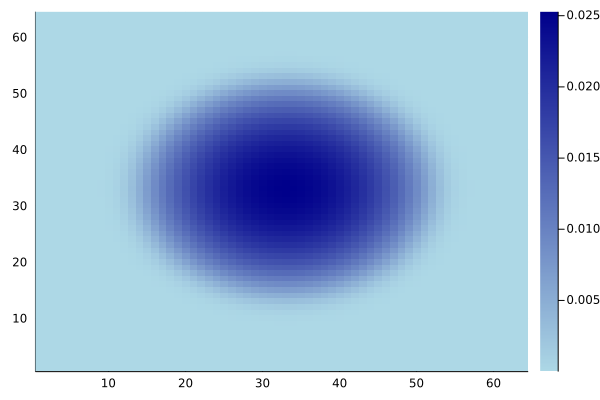

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)